In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

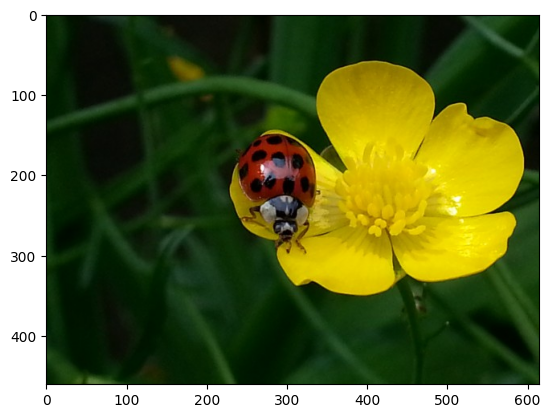

(461, 615, 3)
[[ 8 40  3]
 [ 8 40  3]
 [ 8 40  3]
 ...
 [ 2 38  0]
 [ 2 38  0]
 [ 2 38  0]]


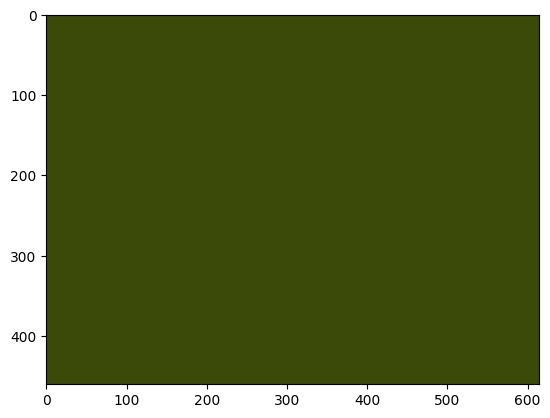

(461, 615, 3)


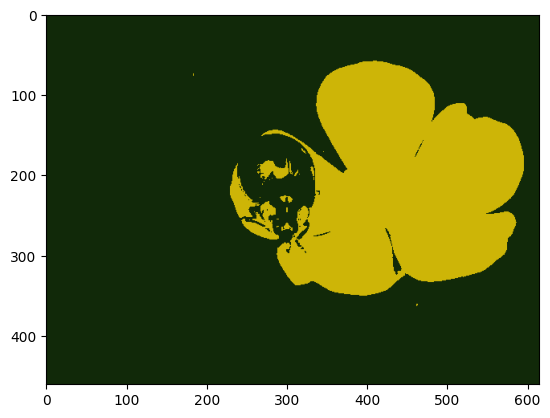

(461, 615, 3)


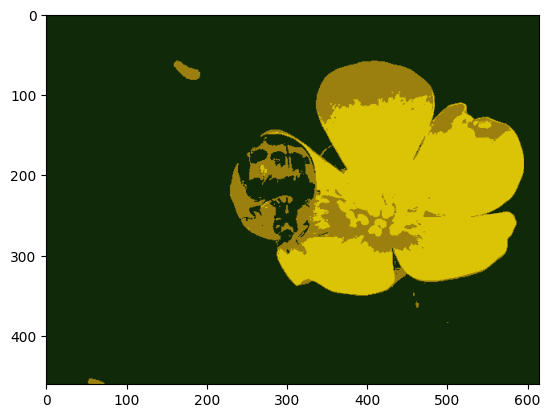

(461, 615, 3)


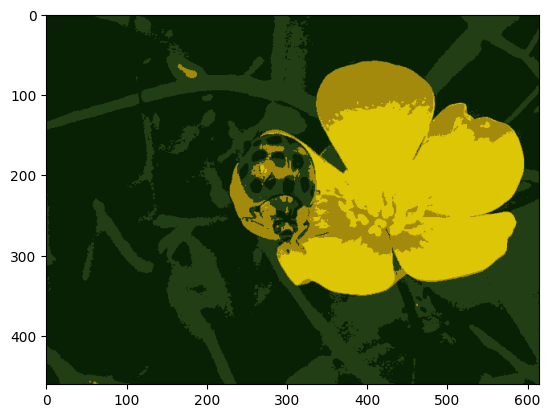

(461, 615, 3)


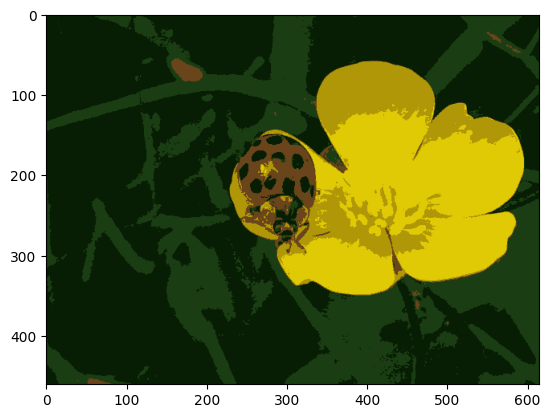

(461, 615, 3)


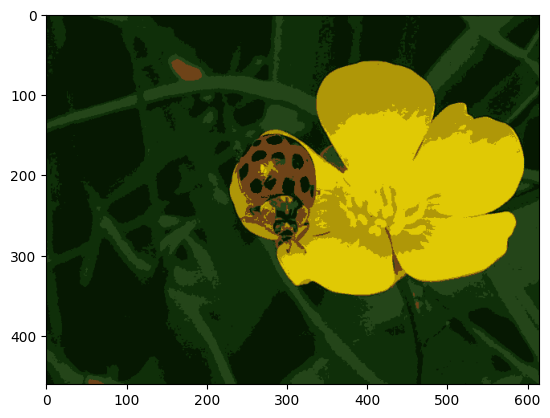

(461, 615, 3)


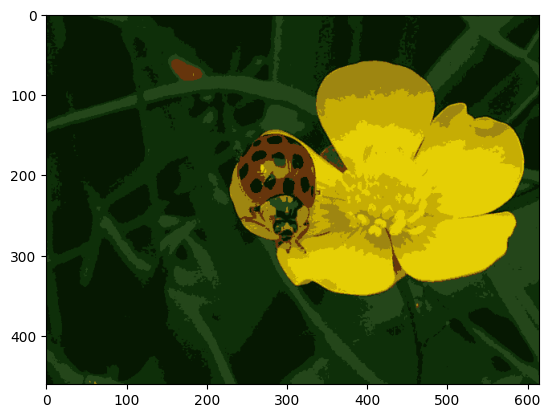

(461, 615, 3)


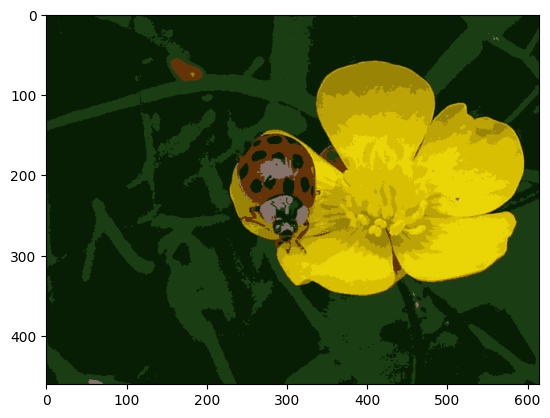

(461, 615, 3)


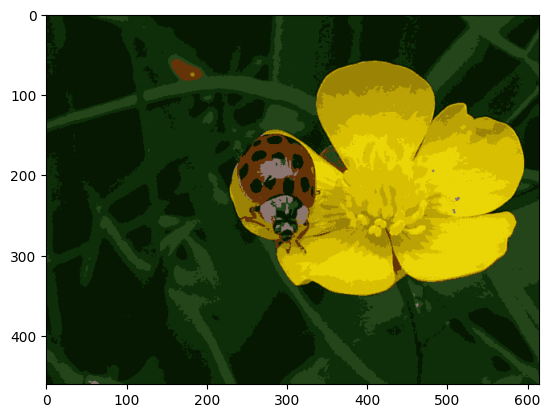

(461, 615, 3)


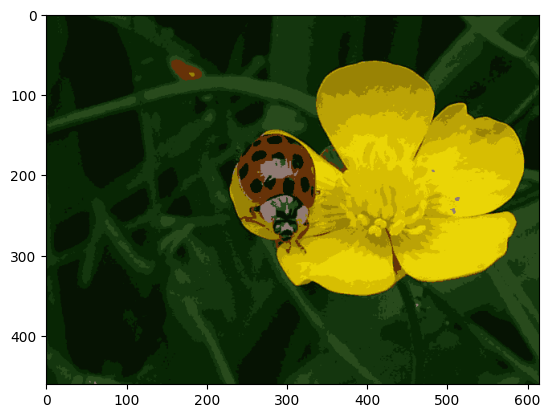

(461, 615, 3)


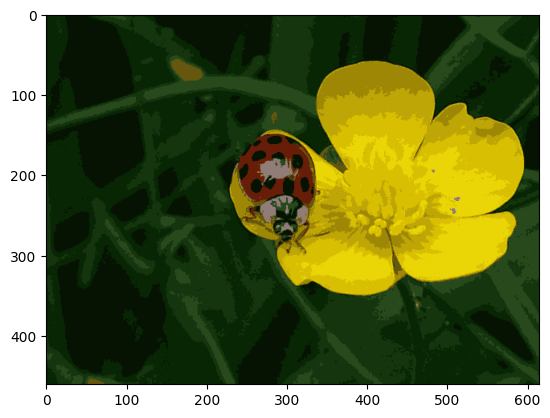

(461, 615, 3)


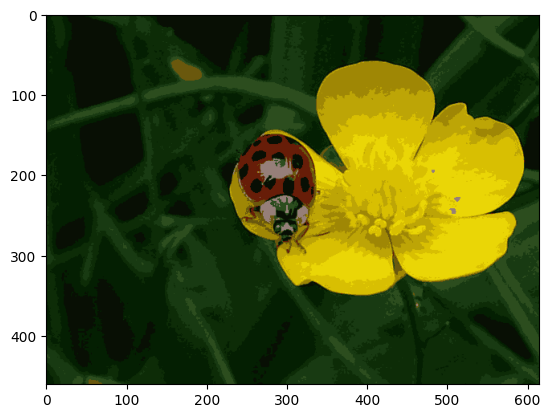

(461, 615, 3)


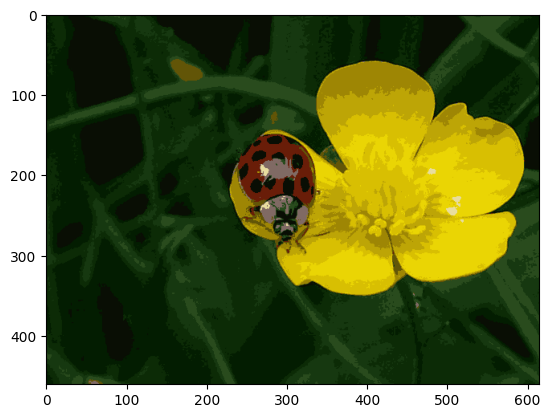

(461, 615, 3)


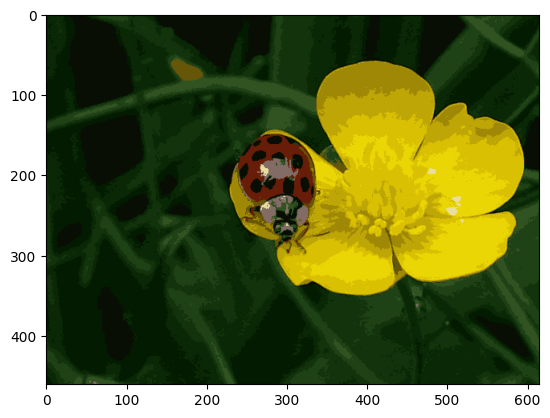

(461, 615, 3)


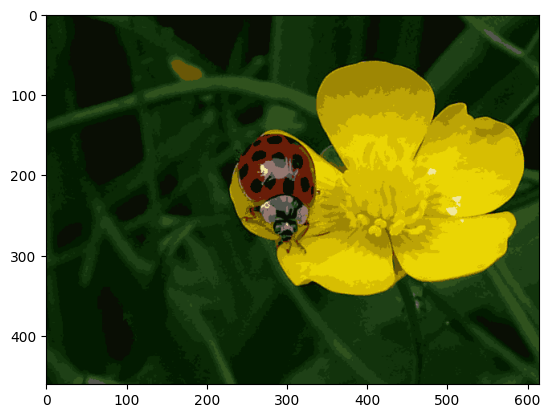

(461, 615, 3)


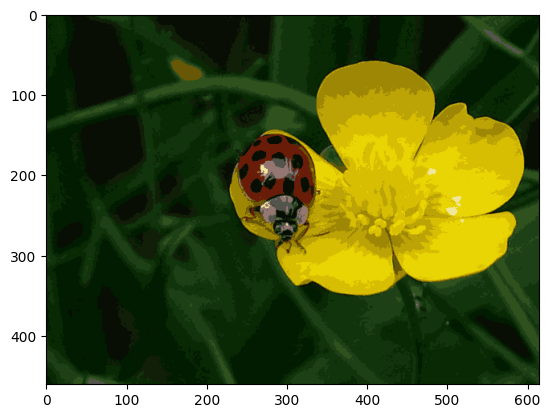

(461, 615, 3)


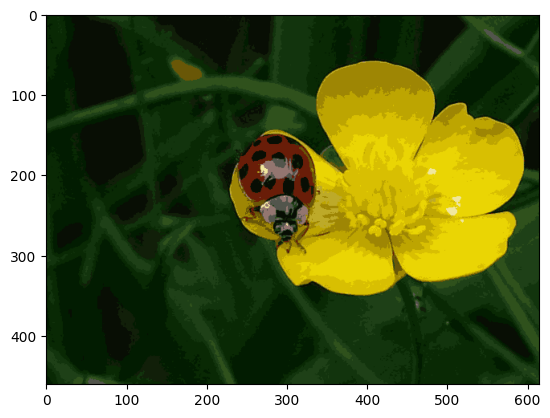

(461, 615, 3)


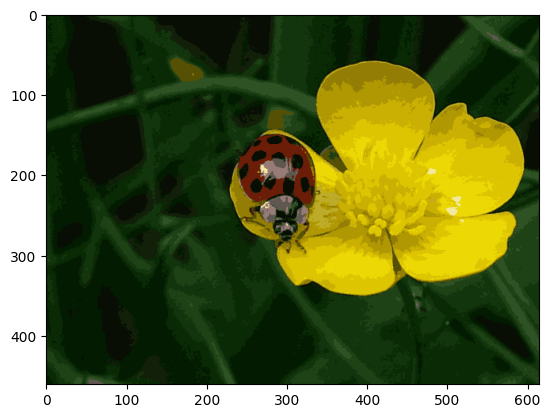

(461, 615, 3)


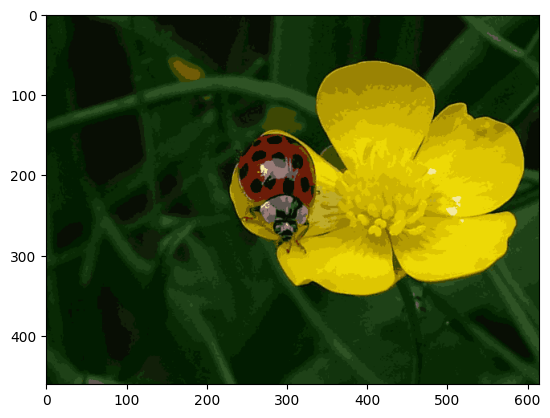

(461, 615, 3)


In [3]:
import PIL
from sklearn.cluster import KMeans
path='D:\ML_UnsupervisedLearning\laydybug.jpg'
image=np.asarray(PIL.Image.open(path))
plt.imshow(image)
plt.show()
print(image.shape)

print(image[0])

X=image.reshape(-1,3)

for c in range(1,20):
    
    kmeans=KMeans(n_clusters=c,random_state=42).fit(X)
    segmented_img=kmeans.cluster_centers_[kmeans.labels_]
    segmented_img=segmented_img.reshape(image.shape)
    segmented_img = segmented_img.astype(np.uint8)
    plt.imshow(segmented_img)
    plt.show()
    print(segmented_img.shape)
    

In [4]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
X,y=load_digits(return_X_y=True)
x_train,y_train=X[:1400],y[:1400]
x_test,y_test=X[1400:],y[1400:]
n_labeled=50
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(x_train[:n_labeled],y_train[:n_labeled])
print(log_reg.score(x_test[:n_labeled:],y_test[:n_labeled:]))

0.8


(50, 64)


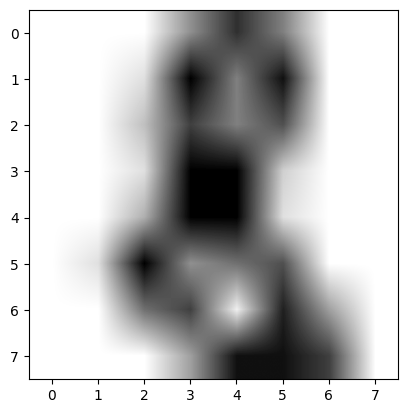

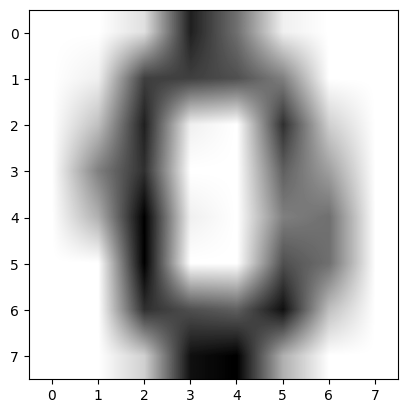

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Assuming x_train is already defined and contains your training data
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
x_digits_dist = kmeans.fit_transform(x_train)
# Get representative digits
representative_digits = np.argmin(x_digits_dist, axis=0)
X_representative_digits = x_train[representative_digits]
# Print shape of representative digits
print(X_representative_digits.shape)
# Display the first representative digit


for n in range(2):
    image = np.asarray(x_train[representative_digits[n], :]).reshape(8, 8)  # Reshape to 8x8
    plt.imshow(image,  cmap="binary",
               interpolation="bilinear")  # Use cmap='gray' for grayscale images
    plt.show()



0.7581863979848866
0.9093198992443325


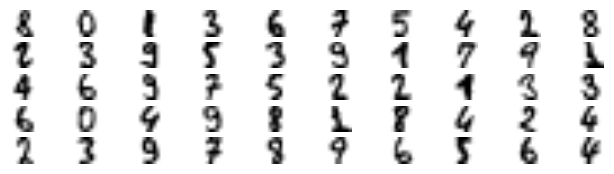

0.8690176322418136


In [10]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(x_train[:n_labeled], y_train[:n_labeled])

print(log_reg.score(x_test, y_test))

log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(x_train, y_train)
print(log_reg_full.score(x_test, y_test))

from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(x_train,y_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = x_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_plot", tight_layout=False)
plt.show()

y_rep_digits=np.array([8,0,1,3,6,7,5,4,2,8,
                       2,3,9,5,3,9,1,7,9,1,
                       4,6,9,7,5,2,2,1,3,3
                       ,6,0,4,9,8,1,8,4,2,4
                       ,2,3,9,7,8,9,6,5,6,4])

# log_reg = LogisticRegression(max_iter=10_000)
# log_reg.fit(X_representative_digits, y_rep_digits)

# print(log_reg.score(x_train, y_train))



# print(np.unique(kmeans.labels_))

y_train_propagated=np.empty(len(x_train),dtype=np.int64)
for i in range(50):
       y_train_propagated[kmeans.labels_ == i] = y_rep_digits[i]
   
log_reg1=LogisticRegression(max_iter=10_000)
log_reg1.fit(x_train,y_train_propagated)
print(log_reg1.score(x_test,y_test))
